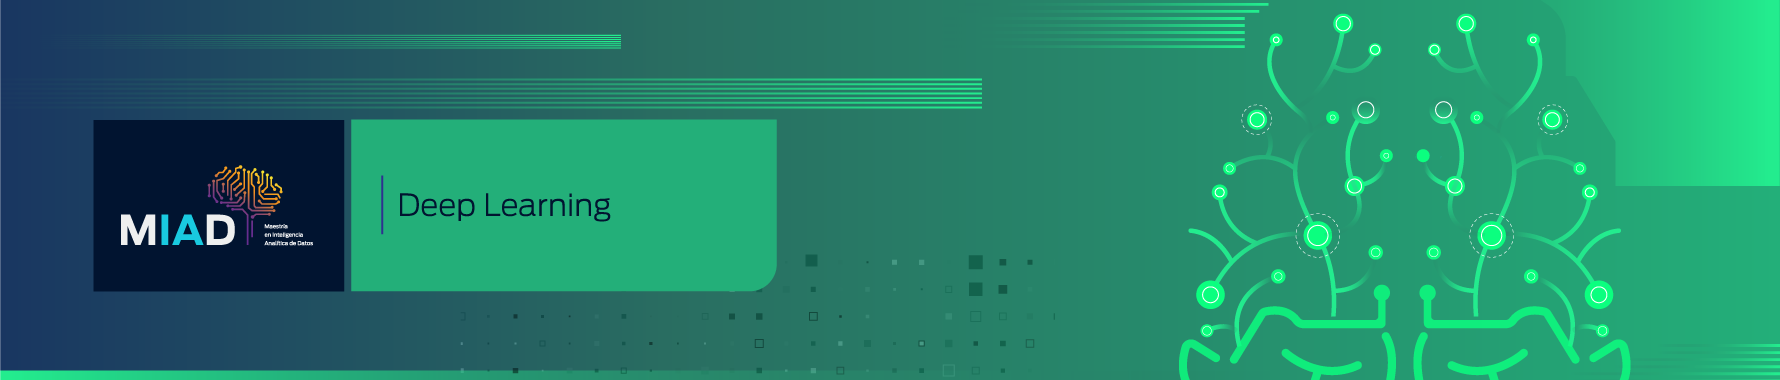

# Estrategias de Implementación
## Redes neuronales con Keras: Una primera aproximación

### Propósito

Por medio de este laboratorio, se pretende hacer una introducción al uso de Keras y TensorFlow, entrenando una red neuronal, evaluando su desempeño y visualizando los resultados.

### Instrucciones generales

1. Para realizar la actividad solo siga las indicaciones asociadas a cada celda del notebook. Sin embargo, siéntase libre de modificar el archivo editando las celdas, lo que le permitirá afianzar su comprensión sobre las distintas funcionalidades de código.  

2. Recuerde que para esta actividad NO necesita realizar ningún tipo de entrega.

### Librerías a importar

A continuación se muestran los comandos a ejecutar para poder implementar los procedimientos de este notebook:


In [ ]:
import pandas as pd
from numpy import loadtxt
from matplotlib import pyplot  as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
tensorflow.__version__

### Carga y separación de datos 

En primer lugar, cargamos los datos a usar en este notebook que corresponden a una base de datos del _National Institute of Diabetes and Digestive and Kidney Diseases_. La variable de interés 'Clase' es una variable binaria que toma el valor de 1 en caso de que el paciente tenga diabetes o de 0 en caso contrario. Por su parte, se tienen las siguientes variables explicativas:

1. Número de veces en embarazo
2. Concentración de glucosa a 2 horas de test de tolerancia
3. Presión sanguínea diastólica
4. Grosor de pliegue de triceps
5. Insulina 2 horas
6. Índice de masa corporal
7. Función de pedigree de diabetes 
8. Edad

In [ ]:
# Cargar los datos
dataset = pd.read_csv('test2.csv', sep=",")
dataset

Luego, partimos la base de datos en una sección de train y otra de test de la siguiente manera: utilizaremos el 80% de los datos para entrenamiento y el 20% restante para evaluación.

In [ ]:
# Dividir muestra en set de train y test
dataset=dataset.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(dataset[:,0:8], dataset[:,8], test_size=0.20)

## Modelo de red neuronal

### Creación de la red

Para solucionar este problema de clasificación, emplearemos un modelo de red neuronal secuencial de tipo _feedforward_. Para ello, creamos el objeto y procedemos a añadir cada una de las capas, especificando el número de neuronas y la función de activación en cada caso.

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Visualización 
Podemos visualizar nuestra red con ayuda de funciones como `plot_model()` o `ann_viz_()`:

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

*Nota:* El término "None" aparece cuando no se ha definido el tamaño del *batch*, concepto que revisaremos en un laboratorio posterior. Por el momento, esto no implica ningún problema funcional ya que *Keras* establece un valor por defecto de 32.

In [ ]:
from ann_visualizer.visualize import ann_viz
# Generar un archivo con la visualización de la red neuronal (se aprecian los nodos en cada capa).
ann_viz(model, filename="NN_S2LSC2", title="Neural Network", view=True) 

*Nota:* Al ejecutar la celda anterior en una imagen de Coursera, puede que obtenga un error del paquete *xdg-open*. Este error se da porque Coursera no puede abrir automáticamente el archivo en una pestaña nueva del navegador. Este error no afecta la ejecución del resto del código, por lo que sugerimos ignorarlo. Por el contrario, este archivo se descarga en el directorio en el que se está trabajando este notebook y puede visualizarlo en formato pdf. Para acceder a este, diríjase al botón superior denominado "Archivos de Laboratorio":
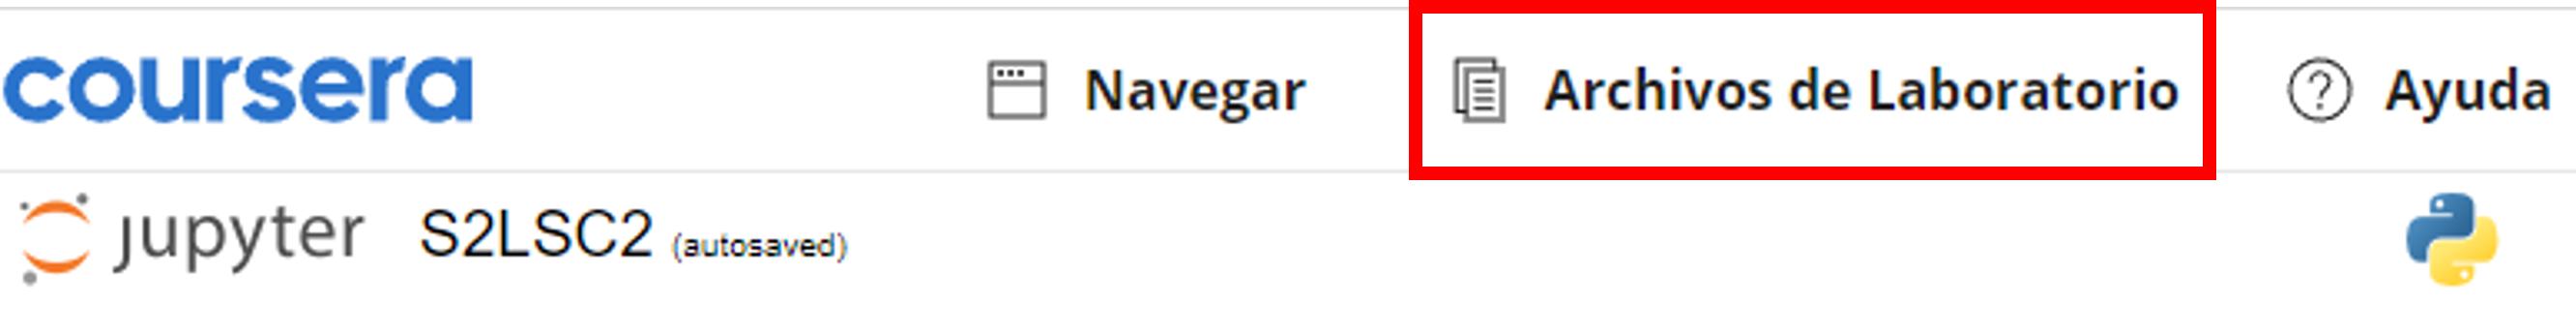
En el panel generado, usted podrá observar la carpeta de raíz de su notebook. Al hacer clic en este, observará el archivo generado con la visualización de la red neuronal, la cual puede descargar:
![arqui2.png](arqui2.png)

### Compilación del modelo 

Con la función [_compile( )_](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential), configuramos nuestra red para entrenarla. Definimos entonces la [función de pérdida](https://www.tensorflow.org/api_docs/python/tf/keras/losses), el [optimizador](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) y las [métricas](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) a evaluar del modelo durante el entrenamiento y prueba. Para este caso, se seleccionó la función de entropía cruzada, el optimizador Adam y el _Accuracy_ como métrica.

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Entrenamiento del modelo 
Entrenamos nuestra red neuronal con los datos de entrenamiento. Podemos evidenciar el valor de la función de pérdida y el accuracy del modelo para cada epoch.

In [ ]:
history=model.fit(X_train, y_train, epochs=1000, batch_size=25)

La anterior información también puede ser presentada gráficamente:

In [ ]:
# Graficar accuracy del modelo
plt.plot(history.history['accuracy'])
plt.title('Accuracy del modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()
# Graficar la función de pérdida evaluada
plt.plot(history.history['loss'])
plt.title('Función de pérdida del modelo')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

Calculamos el _accuracy_ del modelo para el set de train:

In [ ]:
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

### Evaluación del modelo
Podemos evaluar nuestro modelo con ayuda de la función _evaluate( )_ que retorna la función de pérdida y la métrica seleccionada (el _accuracy_ en este caso) dados los datos de prueba:

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

Finalmente, podemos hacer predicciones sobre los datos de test utilizando el modelo y a partir de ello calcular otras métricas relevantes:

In [ ]:
# Hallar probabilidades y clasificación que predice el modelo con threshold de 0.5
predicciones = model.predict(X_test)
y_pred = [round(x[0]) for x in predicciones]
# Imprimir métricas de desempeño
print("El accuracy del modelo es: "+str(accuracy_score(y_true=y_test, y_pred=y_pred)))
print("La precisión del modelo es: "+str(precision_score(y_true=y_test, y_pred=y_pred)))
print("La matriz de confusión es: "+str(confusion_matrix(y_true=y_test, y_pred=y_pred)))
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicciones, pos_label=1)
AUCRegLog=metrics.auc(fpr, tpr)
print("El AUC del modelo es: "+str(AUCRegLog))
# Graficar curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCRegLog)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()